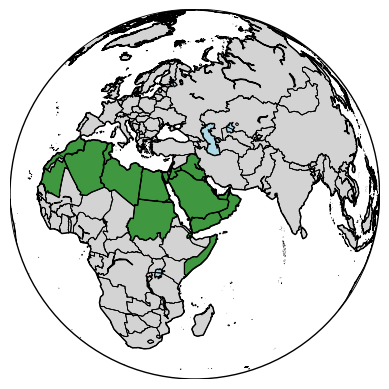

In [9]:
#从Excel导入国家list，以沙特为中心显示

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import pandas as pd

# 从Excel文件中读取国家名称
excel_path = '/Users/simon/PycharmProjects/pythonProject/画图/标记国家颜色/test/test1.xlsx'
df = pd.read_excel(excel_path)

# 创建一个新的球形地图
m = Basemap(projection='ortho', lat_0=24.71, lon_0=44.20)  # 沙特阿拉伯的经纬度

# 绘制海岸线
m.drawcoastlines()

# 绘制国家边界
m.drawcountries()

# 填充国家颜色
m.fillcontinents(color='#d3d3d3', lake_color='lightblue')

# 获取沙特阿拉伯的边界多边形坐标
shp_info = m.readshapefile('ne_10m_admin_0_countries/ne_10m_admin_0_countries', 'countries', drawbounds=True)

# 根据Excel中的国家名称将国家涂成绿色
for info, shape in zip(m.countries_info, m.countries):
    country_name = info['NAME']
    if country_name in df['country'].tolist():
        country_polygon = Polygon(shape, facecolor='green', edgecolor='black', alpha=0.7)
        plt.gca().add_patch(country_polygon)

# 显示地图
plt.show()

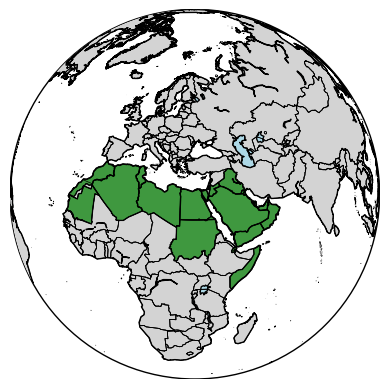

In [10]:
#从Excel导入国家list，以埃及为中心显示

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import pandas as pd

# 从Excel文件中读取国家名称
excel_path = '/Users/simon/PycharmProjects/pythonProject/画图/标记国家颜色/test/test1.xlsx'
df = pd.read_excel(excel_path)

# 创建一个新的球形地图，以埃及为中心
m = Basemap(projection='ortho', lat_0=30, lon_0=30)  # 埃及的经纬度

# 绘制海岸线
m.drawcoastlines()

# 绘制国家边界
m.drawcountries()

# 填充国家颜色
m.fillcontinents(color='#d3d3d3', lake_color='lightblue')

# 获取沙特阿拉伯的边界多边形坐标
shp_info = m.readshapefile('ne_10m_admin_0_countries/ne_10m_admin_0_countries', 'countries', drawbounds=True)

# 根据Excel中的国家名称将国家涂成绿色
for info, shape in zip(m.countries_info, m.countries):
    country_name = info['NAME']
    if country_name in df['country'].tolist():
        country_polygon = Polygon(shape, facecolor='green', edgecolor='black', alpha=0.7)
        plt.gca().add_patch(country_polygon)

# 显示地图
plt.show()

#多个国家（有bug）update 240529

OSError: Unable to open boundary dataset file. Only the 'crude', 'low' and 'intermediate' resolution datasets are installed by default. If you are requesting a 'high' or 'full' resolution dataset, you need to install the `basemap-data-hires` package

/var/folders/78/zkjj4xb94zz0k1ry3d53qwkr0000gn/T/ipykernel_23800/22577517.py:20: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


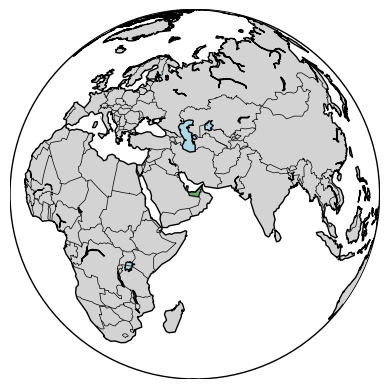

In [19]:
import geopandas as gpd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import os

# 创建一个新的球形地图
m = Basemap(projection='ortho', lat_0=23.4241, lon_0=53.8478)  # 国家的经纬度
#                               lat_0=北纬,     lon_0=东经
# 绘制海岸线
m.drawcoastlines()
# 绘制国家边界
m.drawcountries()

# 填充国家颜色
m.fillcontinents(color='#d3d3d3', lake_color='lightblue')
#                       灰色
# 使用geopandas读取世界国家边界数据
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 查找国家
kazakhstan = world[world.name == 'United Arab Emirates']

# 绘制并填充国家
for geom in kazakhstan.geometry:
    if geom.geom_type == 'Polygon':
        poly = Polygon(list(zip(*m(*geom.exterior.xy))), facecolor='green', edgecolor='black', alpha=0.5)
        plt.gca().add_patch(poly)
    elif geom.geom_type == 'MultiPolygon':
        for polygon in geom:
            poly = Polygon(list(zip(*m(*polygon.exterior.xy))), facecolor='green', edgecolor='black', alpha=0.5)
            plt.gca().add_patch(poly)
#'''
# 保存地图到指定文件夹
output_folder = ' /Users/simon/Desktop/商飞/工具/pythontest/0529'  # 替换为你的文件夹路径
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

output_path = os.path.join(output_folder, 'alq_map.png')  #更改国家 Name
plt.savefig(output_path, dpi=600, bbox_inches='tight')
#'''
# 显示地图
plt.show()

#单一国家（可完美运行）update 240529